# **SANITATION**

This project on sanitation seeks to analyse the global progress of sanitation since the inception of the SDGs, taking into considerations, it's relationship with the three Human Development Indicators(HDI):
1. Life expectancy
2. Education
3. Income

This analysis will answer the following questions:

1. Has the disparity in sanitation between countries been closed since SDG?
2. What is the improvement rate of sanitation globally?
3. Is there a correlation between the HDI and sanitation?

# **Mounting my drive**

To import my datasets uploaded to google drive, the drive has to be mounted

In [ ]:
#mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries**

This section imports all libraries to be used for this analysis

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 16.7 MB 38.8 MB/s 
     |████████████████████████████████| 6.3 MB 38.4 MB/s 


In [ ]:
pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
#Importing libraries

import pandas as pd
import os
import geopandas as gpd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from geopandas import GeoDataFrame
from matplotlib import pyplot

**Reading all datasets from the mounted drive:**

Life expectancy

Safely managed sanitation

Income

Education

In [ ]:
#reading all datasets needed
Income = pd.read_excel('/content/drive/MyDrive/FDS_data/cincome.xlsx')
life_expectancy = pd.read_excel('/content/drive/MyDrive/FDS_data/life_expectancy.xlsx')
world_sanitation = pd.read_csv('/content/drive/MyDrive/FDS_data/share-of-the-population-with-access-to-sanitation-facilities (1).csv')
Education = pd.read_excel('/content/drive/MyDrive/FDS_data/Education 15YrsAndUp.xlsx')

# **SAFELY MANAGED SANITATION SINCE THE SDGs**

Explore the safely managed sanitation data across the countries to analyse for the progress and effect SDGs has on global sanitation.

In [ ]:
# First we have to clean up the data
# Use the mean to fill up for empty cells
world_sanitation= world_sanitation.fillna(world_sanitation.mean())
# Fix Kosovo
world_sanitation['Code'].replace('OWID_KOS', 'XKX', inplace=True)
#To compare the progress, filter the dataset of year 2015(before the inception of SDG) and year 2020(the latest year on the safely managed sanition dataset) 
#Filter the dataset to year 2015
safe_15 = world_sanitation.query(('Year == 2015 & '
                                     'Code != "OWID_WRL" & '
                                     'Code == Code & ' # This means "Code" is not null
                                     '`san_sm` > 0'))

# Get rid of the year column (it's all now 2015)
safe_15 = safe_15.drop(columns=['Year'])

#Filtering the dataset to year 2020
safe_20 = world_sanitation.query(('Year == 2020 & '
                                     'Code != "OWID_WRL" & '
                                     'Code == Code & ' # This means "Code" is not null
                                     '`san_sm` > 0'))


# Get rid of the year column (it's all now 2020)
safe_20 = safe_20.drop(columns=['Year'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


To have a look of the data summary, describe the data

In [ ]:
# Describe 2015 sanitation data
safe_15.describe()

,san_sm,san_bas_minus_sm,san_lim,san_unimp,san_od
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,54.806220,24.442557,6.613744,8.437885,7.310688
std,22.140921,16.510867,8.475946,13.160058,13.987462
min,5.650000,-1.620000,0.000000,0.000000,0.000000
25%,52.103189,15.350000,0.170000,0.260000,0.000000
50%,52.103189,24.813271,2.730000,2.380000,0.470000
75%,62.865000,24.813271,9.905000,11.045000,7.665000
max,100.000000,82.850000,48.930000,62.210000,71.720000


In [ ]:
# Describe 2020 sanitation data
safe_20.describe()

,san_sm,san_bas_minus_sm,san_lim,san_unimp,san_od
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,57.031425,23.220458,7.068150,7.864300,6.413662
std,23.455838,17.073509,9.234078,13.418486,12.589540
min,6.680000,-1.440000,0.000000,0.000000,0.000000
25%,52.103189,11.972500,0.100000,0.027500,0.000000
50%,52.103189,24.813271,2.440000,1.060000,0.070000
75%,72.647500,24.813271,10.895000,9.950000,8.465000
max,100.000000,86.130000,47.440000,65.270000,68.110000


The summary statistics shows that there is an improvement in global sanitation. While an average of 54.81% of the global population had access to safe sanitation in 2015, by 2020, the global average population with access to safely managed sanitation practices increased to 57.03%. Meanwhile, the average percentage of population using open defecation dropped slightly from 7.31% in 2015 to 6.41% in 2020.

# **VISUALIZATION OF SAFELY MANAGED SANITATION**
1. Using a line graph, show the change safely managed sanitation across the years from 2015 to 2020
2. Visualize the average global sanitation on a geomap
3. Visualize this disparity to access the progress of universal coverage as one of the goals of the SDGs.

In [ ]:
#Visualizing the change in safely managed sanitation

san = world_sanitation.query('Code == "OWID_WRL"')
# Create a new Plotly Express Line figure
fig = px.line(san,
              x="Year",
              y="san_sm",
              title="Average global sanitation",
              width=1000, height=650)
# Update the layout of the figure to include a range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True) # adds the slider
    )
)
# Show figure
fig.show()

**Plotting a map of the average global sanitation**

In [ ]:
# Get the geo data to plot a world graph
geojson_path = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_10m_admin_0_countries_lakes.geojson"
geo_data = gpd.read_file(geojson_path)


# Select the Country Code (ADM0_A3) & it's geometry
geo_by_country = geo_data[['ADM0_A3', 'geometry']]

# We need to re-project this geometry to correctly draw the map
geo_by_country = geo_by_country.to_crs('+proj=robin')

# Set the country as index for easier merging!
geo_by_country.set_index('ADM0_A3', inplace=True)
geo_by_country.index.name = 'Code'

In [ ]:
#set index of world sanitation
world_sanitation.set_index('Code', inplace=True)
# merging with geodata
sanitation= world_sanitation.merge(geo_by_country, left_index=True, right_index=True)

#Changing the data type to geodata
sanitation=GeoDataFrame(sanitation)

In [ ]:
# Get all Country codes in Geo Data Frame not in our Emission Data Frame
no_data = geo_by_country.loc[~geo_by_country.index.isin(sanitation.index)]

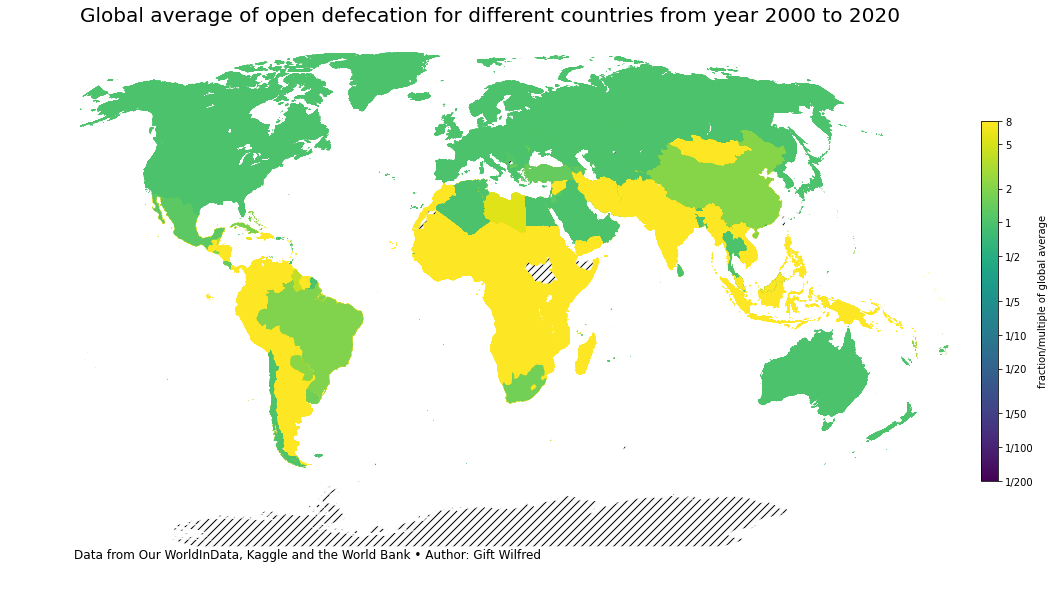

In [ ]:
vmin, vmax = np.log10(1/200), np.log10(8)

# Create an initial geo plot
ax = sanitation.plot(column='san_od',
                 figsize=(16,10),
                 legend=False,
                 vmin=vmin, vmax=vmax) #geo_by_country.plot(column='val', colormap='hot', vmin=vmin, vmax=vmax)

# Add colorbar to the figure
fig = ax.get_figure()
cax = fig.add_axes([0.915, 0.25, 0.015, 0.5])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Fake up the array of the scalar mappable. Urgh...
sm._A = []
ticks = [vmin, -2, np.log10(1/50), np.log10(1/20), -1, np.log10(1/5), np.log10(1/2), 0, np.log10(2), np.log10(5), vmax]
cbar = fig.colorbar(sm,
                    cax=cax,
                    ticks=ticks)
cbar.ax.set_yticklabels(['1/200', '1/100', '1/50', '1/20', '1/10', '1/5', '1/2', '1', '2', '5', '8'])
cbar.set_label('fraction/multiple of global average')

# Shade the countries that have no emission data
no_data.plot(ax=ax, color='#fafafa', hatch='///')

# Set title
ax.set_title('Global average of open defecation for different countries from year 2000 to 2020',
             fontdict={'fontsize': 20},
             loc='left')

# Add annotation
ax.annotate("Data from Our WorldInData, Kaggle and the World Bank • Author: Gift Wilfred",
            xy=(0.07, 0.085),
            size=12,
            xycoords='figure fraction')

# Turn off the axis box
ax.set_axis_off()

# Center the geo plot
ax.set_xlim([-1.3e7, 1.7e7]);

# Show the figure!
ax.get_figure();

From the description statistics perfomed, we see that some countries have a safely managed sanitation of upto a 100% while others have as little as 5%. One of the goals of the SDGs is to close up the gap in this disparity.

Let us see how wide the disparities are between the top 10 countries with safely managed sanitation and the bottom 10 countries in 2015 and 2020, using a line graph.

In [ ]:
#Top 20 safely managed sanitation in 2015
top_15 = safe_15.nlargest(10, ['san_sm'])
#Bottom 20 safely managed sanitation in 2015
bottom_15 = safe_15.nsmallest(10, ['san_sm'])
# Merge top and bottom 20 safely managed sanitation
merge_15 = top_15.append(bottom_15)

#Top 20 safely managed sanitation in 2020
top_20 = safe_20.nlargest(10, ['san_sm'])
#Bottom 20 safely managed sanitation in 2020
bottom_20 = safe_20.nsmallest(10, ['san_sm'])
# Merge top and bottom 20 safely managed sanitation
merge_20 = top_20.append(bottom_20)


#plot a line graph to show disparity

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("2015 safely managed sanitation disparity", "2020 safely managed sanitation disparity"))

fig.add_trace(go.Scatter(x=merge_15['Entity'], y=merge_15['san_sm']),
              row=1, col=1)

fig.add_trace(go.Scatter(x=merge_20['Entity'], y=merge_20['san_sm']),
              row=1, col=2)

fig.update_layout(height=1000, width=1200,
                  title_text="Comparison of 2015 and 2020 safely managed sanitation disparity")

fig.show()

# **HUMAN DEVELOPMENT INDICATORS AND SANITATION**
In order to help improve the rate of progression of water, sanitation and hygiene and achieve the universal coverage by 2030, it is necessary to analyse the factors that could contribute to sanitation, to have an insight of the possible sttrategies towards achieving a universal coverage.

# **Income**

In [ ]:
# Select the Country Code, region and Incomegroup from the income dataframe
Income = Income[['Country Code', 'Region', 'IncomeGroup']]

#Set country code as index to allow for concatenation
Income.set_index('Country Code', inplace=True)
Income.index.name = 'Code'

In [ ]:
#merging safely managed and sanitation
san_income = world_sanitation.merge(Income, left_index= True, right_index= True)

Determining the relationship between income on sanitation

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



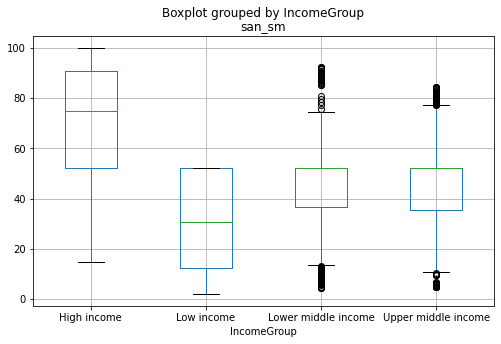

In [ ]:
#Using a boxplot to visualize the correlation
san_income.boxplot(column='san_sm', by='IncomeGroup', figsize=(8,5))

The box plot shows there is a correlation between income and sanitation.

High income countries have a higher percentage of safely managed sanitation compared to other incomegroups.

# **LIFE EXPECTANCY**

In [ ]:
# Select the Country name, and year 2020 from the life expectancy dataframe
life_2020 = life_expectancy[['Country Name', '2020']]

# Replace empty cells with average
life_2020 = life_2020.fillna(life_2020.mean())

#Set country code as index to allow for concatenation
life_2020.set_index('Country Name', inplace=True)
life_2020.index.name = 'Name'

safe_20.set_index('Entity', inplace=True)

#merging sanitation and life expectancy
san_l20 = safe_20.merge(life_2020, left_index= True, right_index= True)
san_l20.rename(columns = {'2020':'lifeExpectancy'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
#Calculate for the correlation value
correlation = san_l20['san_sm'].corr(san_l20['lifeExpectancy'])
correlation

0.5974507283205248

Text(0, 0.5, 'san_sm')

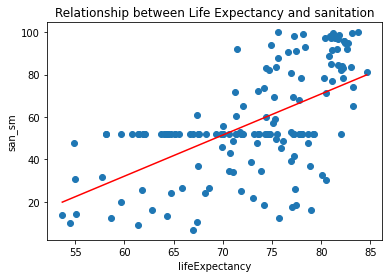

In [ ]:
# Visualizing the correlation with a scatter plot
plt.scatter(san_l20['lifeExpectancy'], san_l20['san_sm'])
  
# This will fit the best line into the graph
plt.plot(np.unique(san_l20['lifeExpectancy']), np.poly1d(np.polyfit(san_l20['lifeExpectancy'], san_l20['san_sm'], 1))
         (np.unique(san_l20['lifeExpectancy'])), color='red')

# adds the title
plt.title('Relationship between Life Expectancy and sanitation')
# Labelling axes
plt.xlabel('lifeExpectancy')
plt.ylabel('san_sm')

The countries with a higher safely managed sanitation also have a high life expectancy.

# **EDUCATION**

In [ ]:
Education.columns = Education.columns.str.strip()

In [ ]:
# Select the Country name, and total from the education dataframe
edu = Education[["Country", "Total"]]

#Set country code as index to allow for concatenation
edu.set_index('Country', inplace=True)
edu.index.name = 'Entity'

#merging sanitation and life expectancy
san_edu = safe_20.merge(edu, left_index= True, right_index= True)
san_edu.rename(columns = {'Total':'percentageLiteracy above 15years'}, inplace = True)

In [ ]:
# cleaning empty cells
san_edu=san_edu.fillna(san_edu.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Text(0, 0.5, 'san_sm')

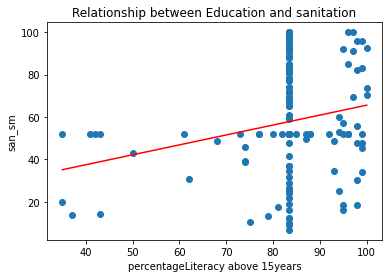

In [ ]:
# Visualizing the correlation with a scatter plot
plt.scatter(san_edu['percentageLiteracy above 15years'], san_edu['san_sm'])
  
# This will fit the best line into the graph
plt.plot(np.unique(san_edu['percentageLiteracy above 15years']), np.poly1d(np.polyfit(san_edu['percentageLiteracy above 15years'], san_edu['san_sm'], 1))
         (np.unique(san_edu['percentageLiteracy above 15years'])), color='red')

# adds the title
plt.title('Relationship between Education and sanitation')
# Labelling axes
plt.xlabel('percentageLiteracy above 15years')
plt.ylabel('san_sm')

In summary, to the improve the overall sanitation rate globally and close up the disparities between countries, the HDI has to be visited and improved as this has been to have an impact on safely managed sanitation.